# 0. Import and Load data

In [10]:
print("hi")

hi


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

In [14]:
df_train = pd.read_excel('/opt/ml/sentiment_analysis/data/Training.xlsx') #40879개
df_test = pd.read_excel('/opt/ml/sentiment_analysis/data/Test.xlsx') #5130개

In [15]:
df_train.head(3)

,번호,연령,성별,상황키워드,신체질환,감정_대분류,감정_소분류,사람문장1,시스템응답1,사람문장2,시스템응답2,사람문장3,시스템응답3,사람문장4,시스템응답4
0,44164,청년,남성,"연애, 결혼, 출산",해당없음,기쁨,신이 난,아내가 드디어 출산하게 되어서 정말 신이 나.,아내분이 출산을 하시는군요. 정말 축하드려요.,아 지금 정말 신이 나.,잘 된 일이네요.,아기가 점점 클게 벌써 기대가 되네. 내가 많이 놀아줘야지.,좋은 아빠가 되실 거 같아요. 진심으로 축하드려요.,NaN,NaN
1,3926,노년,남성,"건강, 죽음",만성질환 유,불안,스트레스 받는,당뇨랑 합병증 때문에 먹어야 할 약이 열 가지가 넘어가니까 스트레스야.,약 종류가 많아 번거로우시겠어요.,건강할 때 관리 좀 잘할걸 하는 생각이 들더라고.,현재 상황에서 변화를 주기 위해 어떻게 하면 될까요?,약을 잘 챙겨 먹고 나을 수 있도록 노력해야지.,약을 잘 챙겨 먹어 건강해지시길 바랄게요.,NaN,NaN
2,50882,청소년,여성,학업 및 진로,해당없음,당황,당황,고등학교에 올라오니 중학교 때보다 수업이 갑자기 어려워져서 당황스러워.,고등학교 수업이 중학교 때와는 다르게 갑자기 어려워서 당황스러우시군요.,아직 학기 초인데 내가 수업에 잘 따라갈 수 있을지 걱정돼.,이 상황에서 할 수 있는 게 어떤 것이 있을까요?,중학교 수업을 들을 때보다 훨씬 더 열심히 할 거야.,수업을 어떤 방식으로 열심히 듣는게 좋을까요?,선생님이 강조하신 부분을 필기하고 집에서 매일 수업 내용을 복습하려고 해.,열심히 해서 좋은 결과가 있었으면 좋겠어요.


In [17]:
df_train.감정_대분류.value_counts()

불안     7328
분노     6920
슬픔     6915
기쁨     6730
상처     6624
당황     6360
불안        1
기쁨        1
Name: 감정_대분류, dtype: int64

In [18]:
df_train.감정_소분류.value_counts()

혼란스러운          1370
고립된            1269
걱정스러운          1056
우울한             852
짜증내는            834
분노              831
스트레스 받는         828
두려운             782
노여워하는           733
실망한             733
충격 받은           727
편안한             727
눈물이 나는          724
슬픔              720
기쁨              719
불안              715
툴툴대는            712
한심한             712
만족스러운           712
괴로워하는           710
후회되는            709
당혹스러운           704
신이 난            703
안도              697
부끄러운            695
감사하는            692
성가신             682
억울한             682
구역질 나는          681
배신당한            677
비통한             671
죄책감의            667
신뢰하는            665
조심스러운           662
상처              660
낙담한             657
악의적인            653
환멸을 느끼는         651
초조한             643
좌절한             642
회의적인            642
가난한, 불우한        634
남의 시선을 의식하는     630
자신하는            625
당황              623
취약한             619
희생된             617
안달하는            615
마비된             614
외로운             611


In [19]:
df_valid.감정_소분류.value_counts()

혼란스러운          180
고립된            152
스트레스 받는        108
걱정스러운          107
눈물이 나는         107
노여워하는          103
기쁨             102
괴로워하는           99
불안              97
충격 받은           97
죄책감의            96
툴툴대는            95
상처              95
두려운             94
좌절한             94
짜증내는            93
안달하는            93
남의 시선을 의식하는     92
조심스러운           92
우울한             91
신이 난            91
한심한             90
후회되는            90
실망한             90
감사하는            89
당혹스러운           87
안도              86
슬픔              86
분노              86
자신하는            86
낙담한             85
만족스러운           85
초조한             84
환멸을 느끼는         84
회의적인            83
성가신             83
구역질 나는          83
편안한             82
염세적인            82
신뢰하는            81
부끄러운            81
억울한             80
외로운             80
질투하는            79
느긋              78
희생된             77
열등감             76
취약한             76
당황              75
마비된             75
방어적인            73
배신당한            73
비통한         

In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40879 entries, 0 to 40878
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   번호      40879 non-null  int64 
 1   연령      40879 non-null  object
 2   성별      40879 non-null  object
 3   상황키워드   40879 non-null  object
 4   신체질환    40879 non-null  object
 5   감정_대분류  40879 non-null  object
 6   감정_소분류  40879 non-null  object
 7   사람문장1   40879 non-null  object
 8   시스템응답1  40879 non-null  object
 9   사람문장2   40879 non-null  object
 10  시스템응답2  40879 non-null  object
 11  사람문장3   31059 non-null  object
 12  시스템응답3  31059 non-null  object
 13  사람문장4   1472 non-null   object
 14  시스템응답4  1362 non-null   object
dtypes: int64(1), object(14)
memory usage: 4.7+ MB


In [5]:
# 어떤 항목이 있는가 확인하기 위하여 train + valid를 하겠음
df_all = pd.concat([df_train, df_valid],ignore_index = True)
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46009 entries, 0 to 46008
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   번호      46009 non-null  int64 
 1   연령      46009 non-null  object
 2   성별      46009 non-null  object
 3   상황키워드   46009 non-null  object
 4   신체질환    46009 non-null  object
 5   감정_대분류  46009 non-null  object
 6   감정_소분류  46009 non-null  object
 7   사람문장1   46009 non-null  object
 8   시스템응답1  46009 non-null  object
 9   사람문장2   46009 non-null  object
 10  시스템응답2  46009 non-null  object
 11  사람문장3   34933 non-null  object
 12  시스템응답3  34933 non-null  object
 13  사람문장4   1623 non-null   object
 14  시스템응답4  1498 non-null   object
dtypes: int64(1), object(14)
memory usage: 5.3+ MB


- 3, 4에서는 결측값이 있는 것을 확인 가능함
- 3까지는 문장에 대한 응답이 모두 존재하나 4의 경우 시스템 응답이 없는 경우가 존재함 -->`확인해보자`

# 1. 중복 data 확인

In [6]:
# 열 이름을 가져온다
col_name = list(df_all)
# 번호를 제외한 중복을 확인
col_name = col_name[1:]
df_all[df_all.duplicated(col_name)]

,번호,연령,성별,상황키워드,신체질환,감정_대분류,감정_소분류,사람문장1,시스템응답1,사람문장2,시스템응답2,사람문장3,시스템응답3,사람문장4,시스템응답4


- 없다

# 2. 감정 분포 확인

## 1) 감정 대분류

In [24]:
df_all.감정_대분류.value_counts()

불안     8235
분노     7793
슬픔     7776
기쁨     7571
상처     7440
당황     7192
불안        1
기쁨        1
Name: 감정_대분류, dtype: int64

In [36]:
df_all[df_all['감정_대분류']=='불안 ']

,번호,연령,성별,상황키워드,신체질환,감정_대분류,감정_소분류,사람문장1,시스템응답1,사람문장2,시스템응답2,사람문장3,시스템응답3,사람문장4,시스템응답4
34527,38866,중년,여성,"직장, 업무 스트레스",해당없음,불안,스트레스 받는,오 대리가 자기 잘못을 끝까지 인정하지 않아서 더 이상 말 섞기가 싫어.,잘못을 인정 안 하는 오 대리와 말 섞기가 싫으시군요.,고집만 세서 말이 안 통해. 답답하고 화가 나.,스트레스 받으시겠어요. 어떻게 하면 기분이 나아질 수 있을까요?,그냥 무시해야겠어.,적극적인 할인 기간과 물품 이용이 생활에 도움이 되길 바라요.,NaN,NaN


In [37]:
# '불안','기쁨' 이 아니라 '불안 ', '기쁨 '으로 된 것을 바꾼다.
df_all.loc[35511, '감정_대분류']= '기쁨'
df_all.loc[34527, '감정_대분류']= '불안'

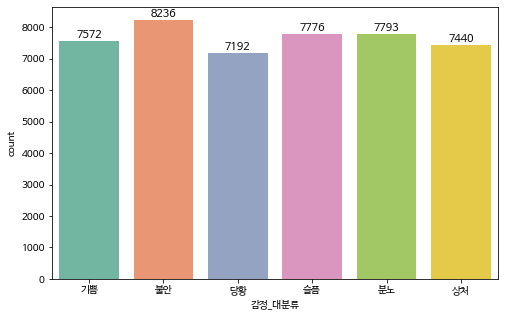

In [40]:
countplt,ax = plt.subplots(figsize=(8,5))

ax = sns.countplot(x='감정_대분류', data=df_all, palette='Set2');
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 100,rect.get_height(),horizontalalignment='center', fontsize = 11)


## 2) 감정 소분류

In [45]:
df_all.감정_소분류.value_counts()

혼란스러운          1550
고립된            1421
걱정스러운          1163
우울한             943
스트레스 받는         936
짜증내는            927
분노              917
두려운             876
노여워하는           836
눈물이 나는          831
충격 받은           824
실망한             823
기쁨              821
불안              812
괴로워하는           809
편안한             809
툴툴대는            807
슬픔              806
한심한             802
후회되는            799
만족스러운           797
신이 난            794
당혹스러운           791
안도              783
감사하는            781
부끄러운            776
성가신             765
구역질 나는          764
죄책감의            763
억울한             762
상처              755
조심스러운           754
배신당한            750
신뢰하는            746
비통한             742
낙담한             742
좌절한             736
환멸을 느끼는         735
초조한             727
회의적인            725
악의적인            723
남의 시선을 의식하는     722
자신하는            711
안달하는            708
가난한, 불우한        702
당황              698
취약한             695
희생된             694
외로운             691
마비된             689


- 너무 많아서 눈에 안들어옴

## 3) 감정 대분류 - 감정 소분류

In [102]:
def drawplot(r,c,main_category):
    ax[r][c].set_title(main_category)
    ax1 = sns.countplot(y='감정_소분류', data=df_all[df_all['감정_대분류']==main_category], palette='hls',ax=ax[r][c]);
    for rect in ax1.patches:
        ax1.text (rect.get_width()+20,rect.get_y() + rect.get_height()/2,rect.get_width(),horizontalalignment='center', fontsize = 11)

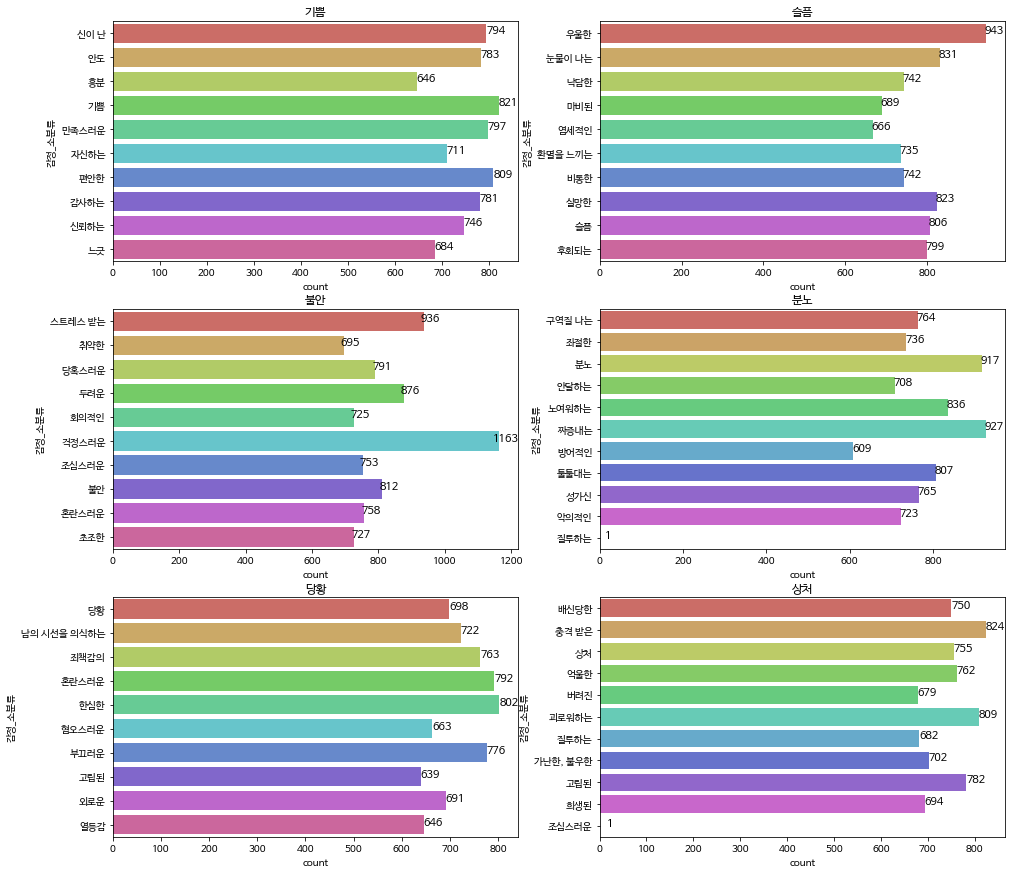

In [103]:
countplt,ax = plt.subplots(figsize=(16,15),nrows=3,ncols=2)
main_category_list = ['기쁨','불안','당황','슬픔','분노','상처']
for c in range(2):
    for r in range(3):
        drawplot(r,c,main_category_list[r+c*3])

# 3. 신체 질환

## 1) 신체 질환

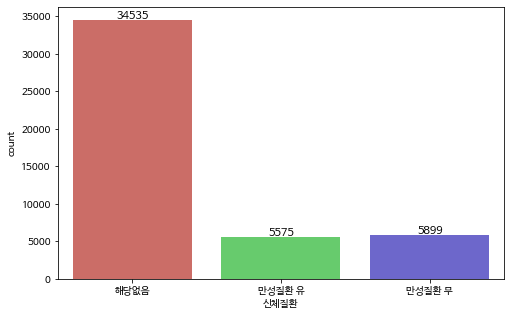

In [157]:
countplt,ax = plt.subplots(figsize=(8,5))

ax = sns.countplot(x='신체질환', data=df_all, palette='hls');
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 100,rect.get_height(),horizontalalignment='center', fontsize = 11)


## 2) 감정 대분류 - 신체 질환 관계

[2039, 1949, 1944, 1854, 1850, 1838]


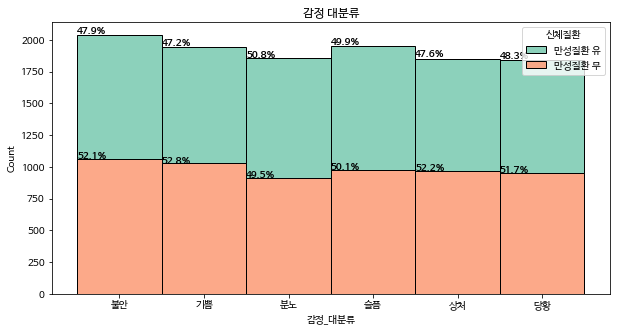

In [156]:
countplt,ax = plt.subplots(figsize=(10,5))


plt.title("감정 대분류")
df_chronic = df_all[(df_all['신체질환']=='만성질환 유')|(df_all['신체질환']=='만성질환 무')]
ax = sns.histplot(data = df_chronic,x = '감정_대분류', hue='신체질환',
                  multiple = 'stack',palette='Set2') #kde=True)


# % 표시
age_count= list(df_chronic.감정_대분류.value_counts())
print(age_count)
age_count[0],age_count[1], age_count[2],age_count[3], age_count[4],age_count[5]\
    = age_count[0],age_count[2], age_count[4],age_count[1], age_count[3],age_count[5]

for i,p in enumerate(ax.patches):
    txt = str(((p.get_height() / (age_count[i%6]))*100).round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height() if i//6 ==0 else age_count[i%6]+10
    ax.text(txt_x,txt_y,txt,horizontalalignment='left',size=10,fontweight ='bold')

- 만성질환과 감정의 관계는 없는듯? 고르게 나타나있다

# 4. 연령 및 성별

## 1) 성별

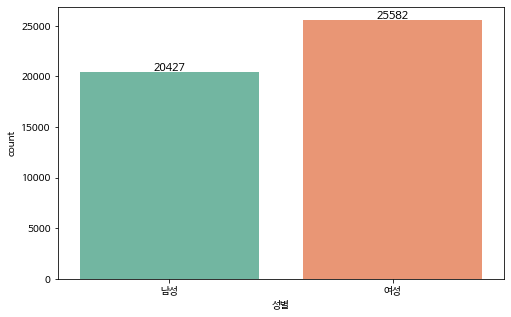

In [108]:
countplt,ax = plt.subplots(figsize=(8,5))

ax = sns.countplot(x='성별', data=df_all, palette='Set2');
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 100,rect.get_height(),horizontalalignment='center', fontsize = 11)


## 2) 연령

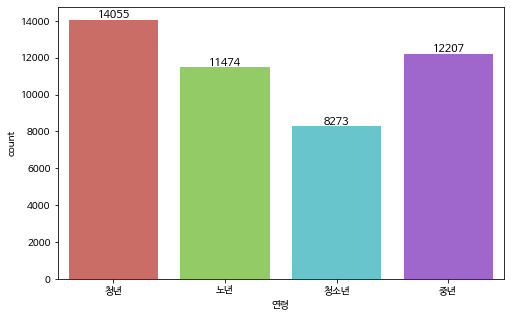

In [154]:
countplt,ax = plt.subplots(figsize=(8,5))

ax = sns.countplot(x='연령', data=df_all, palette='hls');
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 100,rect.get_height(),horizontalalignment='center', fontsize = 11)


## 3) 연령 및 성별

[14055, 12207, 11474, 8273]


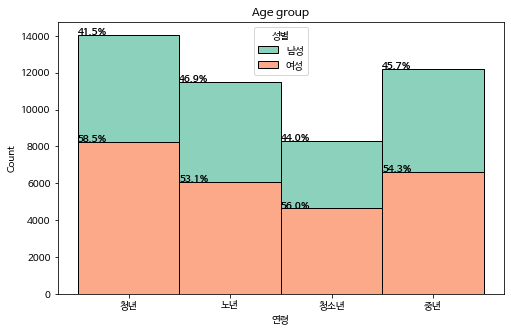

In [129]:
countplt,ax = plt.subplots(figsize=(8,5))

plt.title("Age group")
ax = sns.histplot(data = df_all,x = '연령', hue='성별', multiple = 'stack',palette='Set2') #kde=True)


# % 표시
age_count= list(df_all.연령.value_counts())
print(age_count)
age_count[0],age_count[1], age_count[2],age_count[3]=age_count[0],age_count[2], age_count[3],age_count[1]

for i,p in enumerate(ax.patches):
    txt = str(((p.get_height() / (age_count[i%4]))*100).round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height() if i//4 ==0 else age_count[i%4]+10
    ax.text(txt_x,txt_y,txt,horizontalalignment='left',size=10,fontweight ='bold')

# 5. 시스템 대화 4
#### 사람문장4는 존재하지만 시스템응답4가 존재하지 않을 때는 사람이 뭐라고 했을 때일까?

In [179]:
check_p4 = list(df_all[(df_all['시스템응답4'].isnull())&(~(df_all['사람문장4'].isnull()))]['사람문장4'])

In [185]:
print(len(check_p4))
check_p4[:30]

126


['주말에는 내가 직접 연수를 해줘야겠어.',
 '지금 당장의 일은 생각하지 않을래.',
 '나와 비슷한 유명인이나 유튜버들을 보여주려고 해.',
 '처음에 주문할 때 더 분명하게 말해야겠어.',
 '그 친구가 내 마음을 이해해 줬으면 좋겠어.',
 '친구가 내 이야기를 들어주고 공감해 주면 기분이 나아질 것 같아.',
 '당황스럽다고 느낄 수도 있지만 현실적으로 생각하는 데 도움이 될 거야.',
 '제대로된 보고서로 제출했기를 바라야지.',
 '신뢰를 얻을 수 있게 맡은 일을 제대로 해낼 거야.',
 '내 입장을 말하면서 앞으로 내가 함께 돕겠다고 해야겠어.',
 '우리 가게를 아는 사람이 더 늘어나서 매출이 회복되면 좋겠어.',
 '남편이 내 답답한 심정을 알아줬으면 좋겠어.',
 '이번처럼 거짓말을 할 필요 없이 내 의견을 말할 수 있을거야.',
 '모르는 점도 확실히 알 수 있고 무엇보다 답답한 마음이 사라질거야.',
 '많은 사람들과 함께 있는 공간에 익숙해질 수 있어.',
 '트랜스젠더에 대한 정의를 알려주고 나와 비슷한 사람들의 이야기를 해줄거야.',
 '남편이 원하는 바가 뭔지 정확하게 알 수 있을거야.',
 '시간이 부족하면 솔직하게 말하고 양해를 구해야겠어.',
 '사업의 정확한 방향을 정하고 싶어.',
 '앞으로 목이 상하지 않게 건강에 신경 쓸거야.',
 '친구들이랑 더 깊은 얘기도 하고 이해받을 수 있을 것 같아.',
 '나도 놀라지만 말고 보고 배워야겠다는 생각이 들었어.',
 '새로운 거래를 따내고 회사에서도 승진할 수 있을거야.',
 '나와 상관 없는 사람들이 하는 얘기는 그냥 무시할래.',
 '혼자 끙끙 앓는 것보다 직접 대답을 들으면 속이 시원할 것 같아.',
 '앞으로는 더 당당하게 여러 사람이랑 얘기해 보려고.',
 '친구들이 내 입장을 알고 앞으로는 놀리지 않았으면 좋겠어. ',
 '업무도 더 열심히 하고 잘 따라야겠어.',
 '체력관리를 해서 더 오래 공부할 수 있도록 노력 중이야.',
 '친구들이 더 이상 놀리지 않았으

# 6. 상황 키워드

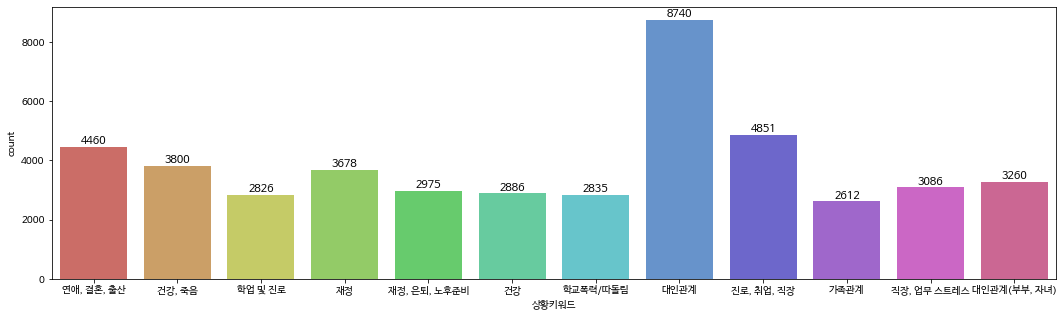

In [190]:
countplt,ax = plt.subplots(figsize=(18,5))

ax = sns.countplot(x='상황키워드', data=df_all, palette='hls');
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 100,rect.get_height(),horizontalalignment='center', fontsize = 11)


### 사용할거면 묶을만한 것..?

- `연애,결혼,출산`
- `건강,죽음`  /  `건강`
- `학업 및 진로`  /  `진로, 취업, 직장`  / `직장, 업무 스트레스`
- `재정`  /  `재정, 은퇴, 노후준비`
- `학교폭력/따돌림`
- `대인관계`
- `가족 관계`  / `대인관계(부부, 자녀)`